<a href="https://colab.research.google.com/github/AmeerTechsoft/Data-science-project/blob/main/Health_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Disease Dianosis Analysis and Prediction



Import the required analysis tools



In [ ]:
#importing the necessary modules

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Diagnosis Dataset

In [ ]:
#Reading in the dataset into a dataframe
df = pd.read_csv("/content/drive/MyDrive/datasets/health diagnosis/dataset.csv")

#Showing the first five entries in the dataset
df.head()

NameError: name 'pd' is not defined

In [ ]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
#Describing the dataframe statistically
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
# Print each disease occurrence and the count
df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [ ]:
# number of unique diseases
df['Disease'].nunique()

41

Severity symptoms

In [ ]:
#Reading the severity weight of the symptoms
df_weight = pd.read_csv("/content/drive/MyDrive/datasets/health diagnosis/Symptom-severity.csv")

#Showing the first five entries in the dataset
df_weight.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [ ]:
#Information about the data
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
#Describing the dataframe statistically
df_weight.describe()

,weight
count,133.000000
mean,4.225564
std,1.323543
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [ ]:
# Reading the severity description of the symptoms
df_description = pd.read_csv('/content/drive/MyDrive/datasets/health diagnosis/symptom_Description.csv')

# Showing the first five entries in the dataset
df_description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [ ]:
# Reading the severity description of the symptoms
df_precausion = pd.read_csv('/content/drive/MyDrive/datasets/health diagnosis/symptom_precaution.csv')

# Showing the first five entries in the dataset
df_precausion.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [ ]:
# converting 'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4' column into a single dictionary
df_precausion['Precautions'] = df_precausion[['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].apply(
    lambda x: x.dropna().tolist(), axis=1)

# Droping 'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4' column
df_precausion.drop(['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4'], axis=1, inplace=True)

In [ ]:
# Showing the first five entries in the dataset
df_precausion.head()

,Disease,Precautions
0,Drug Reaction,"[stop irritation, consult nearest hospital, st..."
1,Malaria,"[Consult nearest hospital, avoid oily food, av..."
2,Allergy,"[apply calamine, cover area with bandage, use ..."
3,Hypothyroidism,"[reduce stress, exercise, eat healthy, get pro..."
4,Psoriasis,"[wash hands with warm soapy water, stop bleedi..."


In [ ]:
df_precausion.to_csv('/content/drive/MyDrive/datasets/health diagnosis/symptom_precaution_edited.csv')

#Cleaning The Data

##Working on the Dataset

In [ ]:
#Counting NaN
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

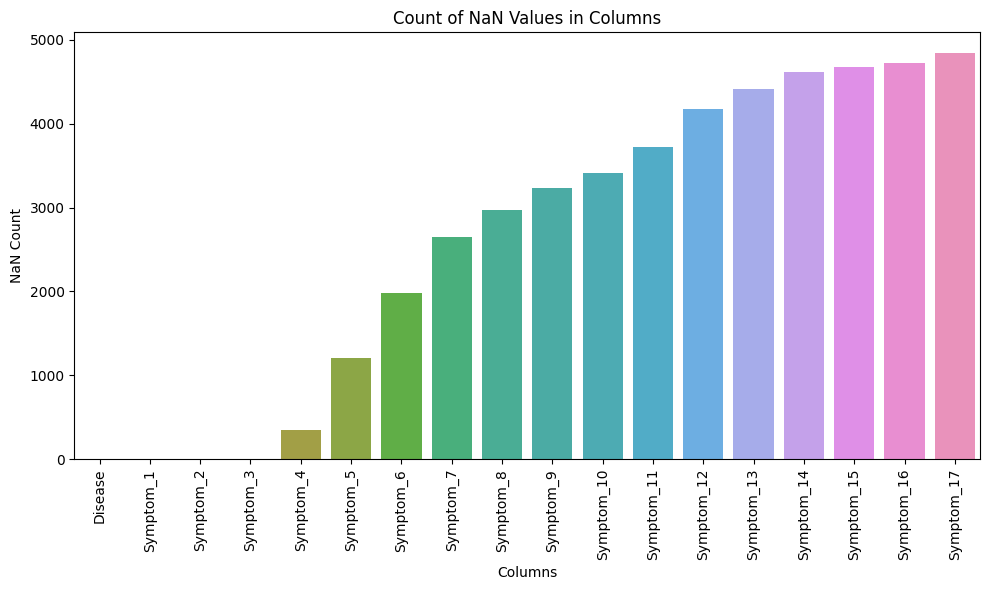

In [ ]:
nan_counts = df.isna().sum()

# Create a bar plot of the NaN counts
plt.figure(figsize=(10, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.title('Count of NaN Values in Columns')
plt.tight_layout()
plt.show()

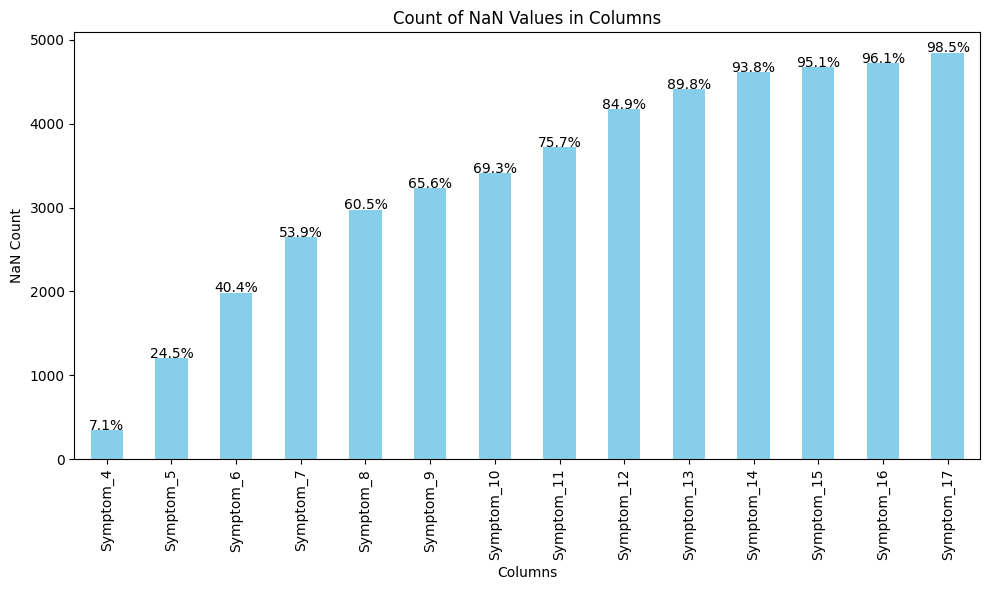

In [ ]:
# Filter columns with NaN counts greater than 0
nan_counts_filtered = nan_counts[nan_counts > 0]

# Calculate the percentage of NaN values in each column
nan_percentage = (nan_counts_filtered / len(df)) * 100

# Create a bar plot of the NaN counts and display the percentage for each column
plt.figure(figsize=(10, 6))
nan_counts_filtered.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.title('Count of NaN Values in Columns')

# Display the percentage for each column above each bar
for i, value in enumerate(nan_counts_filtered):
    plt.text(i, value + 2, f'{nan_percentage[i]:.1f}%', ha='center')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

#Flattening the sring removing whitespaces
column_Header = df.columns
data = df[column_Header].values.flatten()

data_df = pd.Series(data)
data_df = data_df.str.strip()
data_df = data_df.values.reshape(df.shape)

df_edited = pd.DataFrame(data_df, columns=column_Header)
df_edited.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df.set_index('Disease', inplace=True)

In [ ]:
# # removing all the "_" and replaceing them with whitespaces in the strings
# for column in df.columns:
#     df[column] = df[column].str.replace('_', ' ')

Creating a new dataframe where the symptoms are replaced with its dataframe values.

In [ ]:
# replace all "Nan" values with 0

df_edited = df_edited.fillna(0)

df_edited.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# removing all the "_" and replaceing them with whitespaces in the strings in the dataset datadrame
for column in df_edited.columns:
    df_edited[column] = df_edited[column].astype(str).str.replace('_', ' ')

df_edited.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# removing all the "_" and replaceing them with whitespaces in the strings in the symptom weight dataframe
for column in df_weight.columns:
    df_weight[column] = df_weight[column].astype(str).str.replace('_', ' ')

df_weight.tail()

,Symptom,weight
128,inflammatory nails,2
129,blister,4
130,red sore around nose,2
131,yellow crust ooze,3
132,prognosis,5


In [ ]:
# Create a dictionary from severity with symptom as key and weight as value
symptom_weight_dict = df_weight.set_index('Symptom')['weight'].to_dict()

# Replace symptoms in DataFrame 1 with corresponding weight
df_edited.replace(symptom_weight_dict, inplace=True)

# Print the updated DataFrame 1
df_edited

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,foul smell of urine,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_edited = df_edited.applymap(lambda x: x.replace("  ", " "))

In [ ]:
# Get all columns starting with 'Symptom_'
symptom_columns = [col for col in df_edited.columns if col.startswith('Symptom_')]

# Print unique items from symptom columns
for column in symptom_columns:
    unique_items = df_edited[column].unique()
    print(f"Unique items in {column}:")
    for item in unique_items:
        print(item)
    print()

Unique items in Symptom_1:
1
3
4
5
6
7
2

Unique items in Symptom_2:
3
4
5
6
7
2
foul smell of urine

Unique items in Symptom_3:
4
dischromic patches
3
5
6
7
2
foul smell of urine

Unique items in Symptom_4:
dischromic patches
0
4
5
6
spotting urination
2
3
7

Unique items in Symptom_5:
0
4
7
spotting urination
5
3
6
2

Unique items in Symptom_6:
0
7
4
5
3
6
2

Unique items in Symptom_7:
0
4
3
2
6
5

Unique items in Symptom_8:
0
4
5
2
3
6
7

Unique items in Symptom_9:
0
5
4
3
6
7
2

Unique items in Symptom_10:
0
4
6
3
5
2

Unique items in Symptom_11:
0
3
6
4
2
5
7

Unique items in Symptom_12:
0
2
6
7
4
5

Unique items in Symptom_13:
0
3
2
6
5

Unique items in Symptom_14:
0
3
5
7

Unique items in Symptom_15:
0
7
5
3

Unique items in Symptom_16:
0
5
3
2

Unique items in Symptom_17:
0
2



in the above we can see we have 3 other symptoms which do not have a weight which are

* foul smell of urine

* dischromic  patches

* spotting  urination

from the description of the severity above we deduced that the max weight is 7.

so we can make them 0


In [ ]:
# replacing the Strings fro their assigned numerical value
df_edited.replace('foul smell of urine', 0, inplace=True)
df_edited.replace('dischromic patches', 0, inplace=True)
df_edited.replace('spotting urination', 0, inplace=True)


In [ ]:
df_edited.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


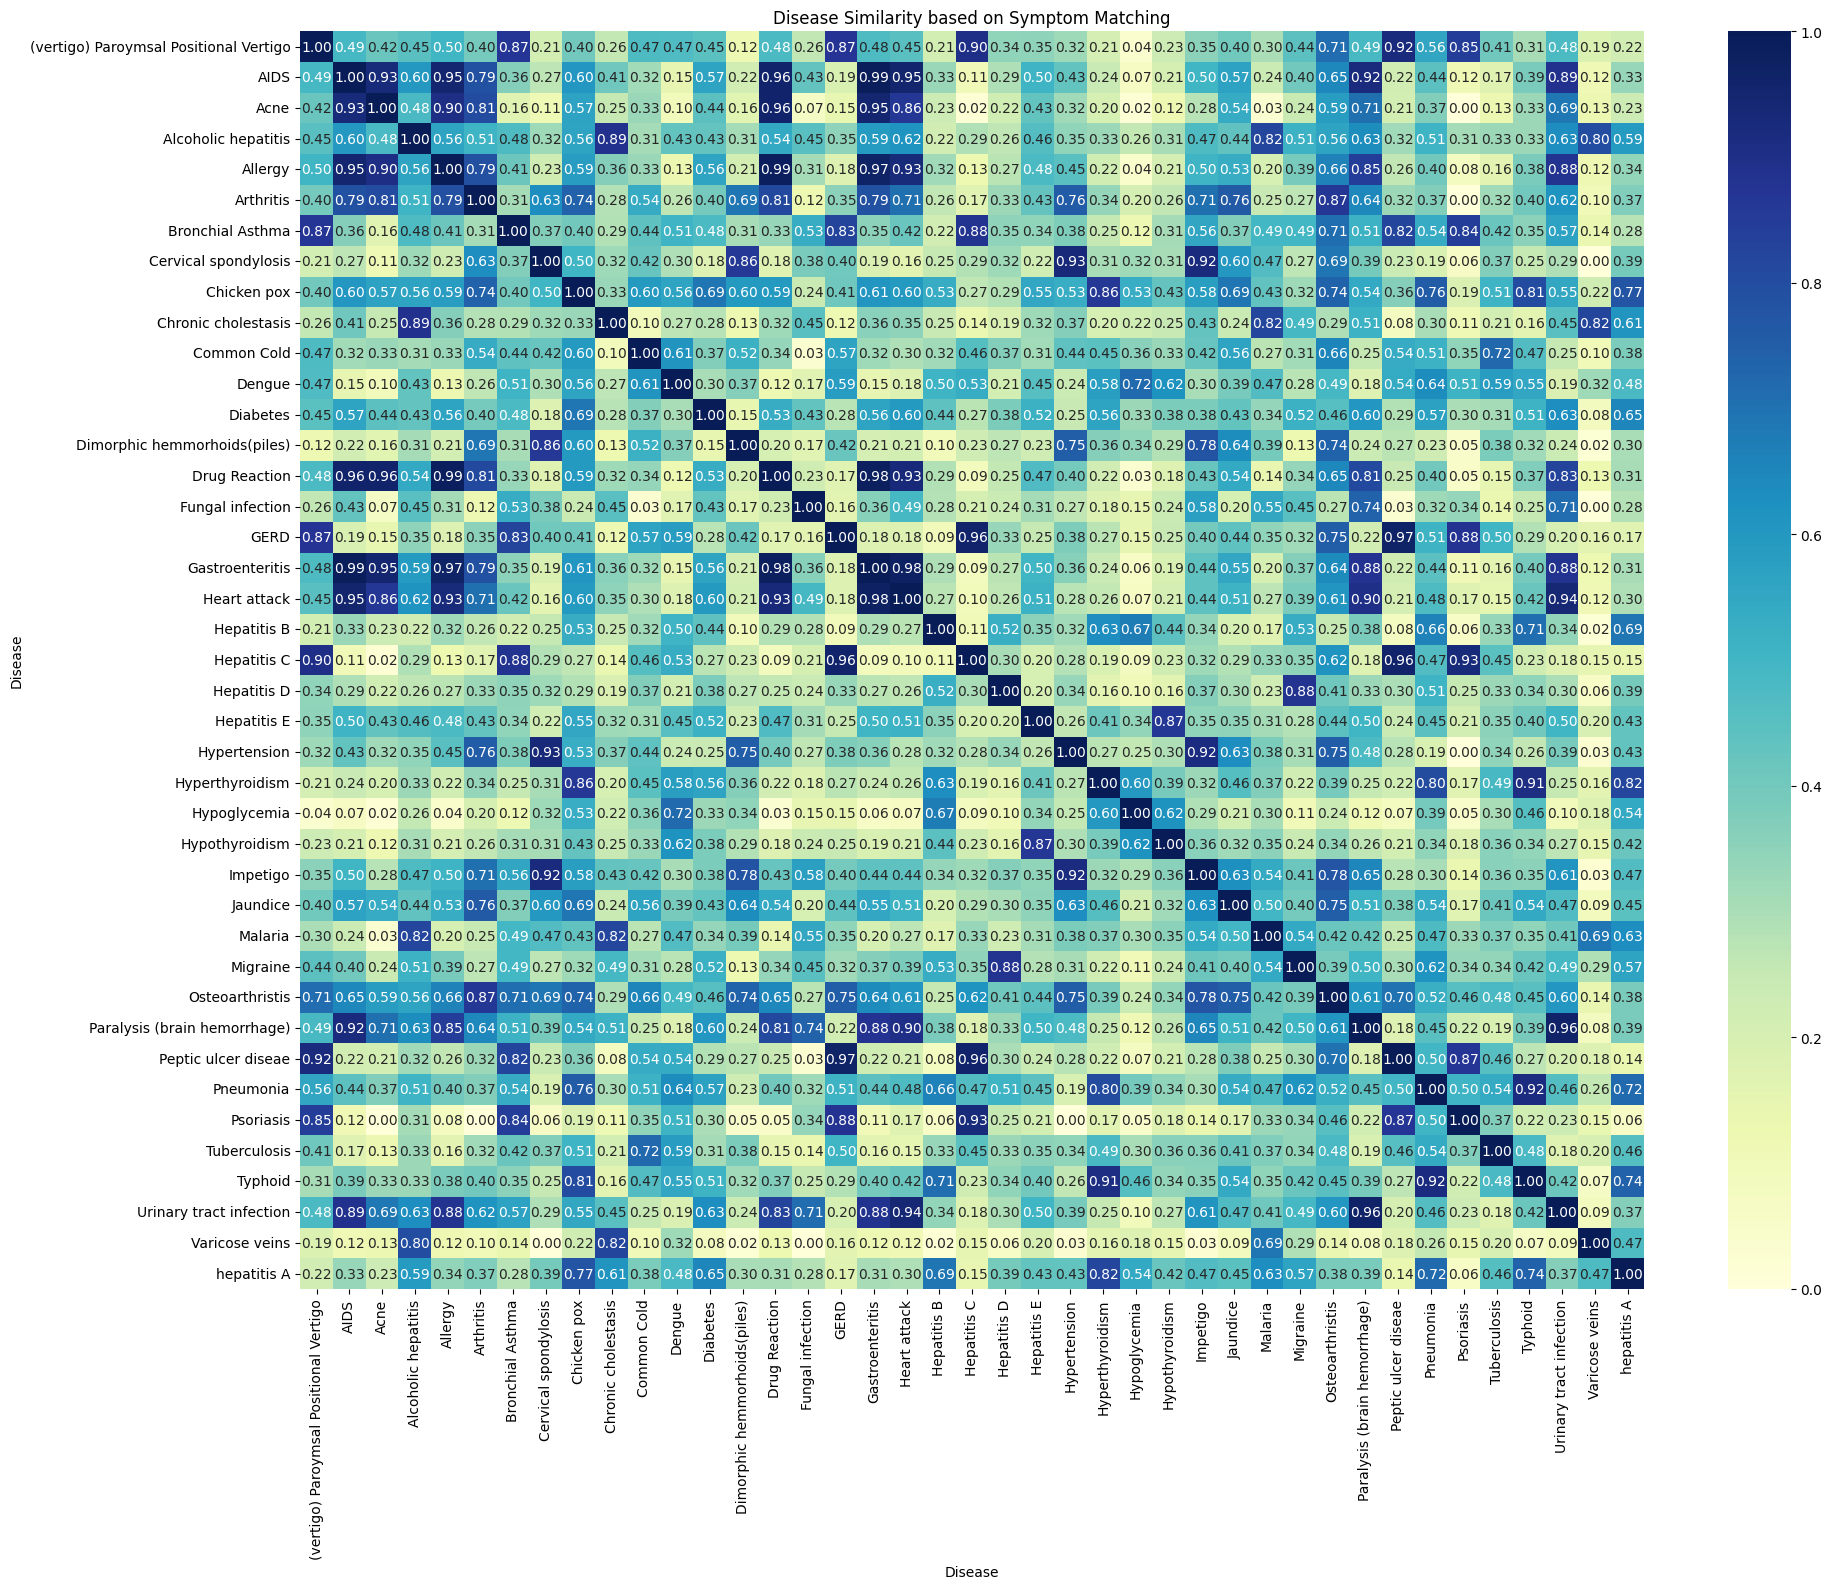

In [ ]:
# Aggregating the symptom features for each disease
aggregated_df = df_edited.groupby('Disease').std()

# Compute the cosine similarity matrix between diseases
similarity_matrix = cosine_similarity(aggregated_df)

# Creating a DataFrame to store the similarity results
similarity_df = pd.DataFrame(similarity_matrix, index=aggregated_df.index, columns=aggregated_df.index)

# Seting up the heatmap plot
plt.figure(figsize=(20, 16))
sns.heatmap(similarity_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Disease Similarity based on Symptom Matching')
plt.xlabel('Disease')
plt.ylabel('Disease')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


Due to the fact that

In [ ]:
similarity_df

Disease,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
Disease,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,1.000000,0.490775,0.418174,0.450699,0.502160,0.398324,0.868363,0.211588,0.399313,0.255720,...,0.714258,0.487944,0.920654,0.555976,0.847293,0.408505,0.307848,0.477427,0.185759,0.218459
AIDS,0.490775,1.000000,0.927885,0.601498,0.951221,0.788817,0.364270,0.268325,0.603083,0.409484,...,0.648392,0.919064,0.216324,0.442748,0.115511,0.173039,0.386428,0.889815,0.116654,0.334493
Acne,0.418174,0.927885,1.000000,0.482142,0.904344,0.806136,0.164172,0.109966,0.569393,0.250671,...,0.587846,0.705946,0.212857,0.368367,0.000000,0.129190,0.327119,0.686238,0.129786,0.233920
Alcoholic hepatitis,0.450699,0.601498,0.482142,1.000000,0.559291,0.507287,0.476320,0.321452,0.562663,0.889234,...,0.560621,0.633491,0.319406,0.507397,0.310483,0.327565,0.327426,0.631498,0.798781,0.592200
Allergy,0.502160,0.951221,0.904344,0.559291,1.000000,0.792264,0.412356,0.225526,0.587479,0.363643,...,0.663391,0.846785,0.257952,0.402105,0.076090,0.159935,0.384195,0.879356,0.119324,0.342314
Arthritis,0.398324,0.788817,0.806136,0.507287,0.792264,1.000000,0.309344,0.632307,0.739868,0.283978,...,0.866496,0.644566,0.324416,0.367431,0.000000,0.318147,0.399475,0.615961,0.101650,0.374363
Bronchial Asthma,0.868363,0.364270,0.164172,0.476320,0.412356,0.309344,1.000000,0.367780,0.401582,0.288753,...,0.707498,0.514092,0.823977,0.537963,0.844288,0.421174,0.353086,0.569057,0.136736,0.277754
Cervical spondylosis,0.211588,0.268325,0.109966,0.321452,0.225526,0.632307,0.367780,1.000000,0.500940,0.324057,...,0.694129,0.392374,0.234386,0.192995,0.064674,0.370631,0.253725,0.294861,0.000000,0.392018
Chicken pox,0.399313,0.603083,0.569393,0.562663,0.587479,0.739868,0.401582,0.500940,1.000000,0.331873,...,0.735068,0.543553,0.364195,0.757217,0.190900,0.507372,0.807270,0.547001,0.224110,0.774212


In [ ]:
threshold = 0.9  # Set a similarity threshold to filter rows

# Iterate over the similarity matrix and print rows with similarity above the threshold
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        similarity = similarity_matrix[i, j]
        if similarity > threshold:
            print(f"Rows {i} and {j} have a similarity of {similarity:.2f}")

Rows 0 and 33 have a similarity of 0.92
Rows 1 and 2 have a similarity of 0.93
Rows 1 and 4 have a similarity of 0.95
Rows 1 and 14 have a similarity of 0.96
Rows 1 and 17 have a similarity of 0.99
Rows 1 and 18 have a similarity of 0.95
Rows 1 and 32 have a similarity of 0.92
Rows 2 and 4 have a similarity of 0.90
Rows 2 and 14 have a similarity of 0.96
Rows 2 and 17 have a similarity of 0.95
Rows 4 and 14 have a similarity of 0.99
Rows 4 and 17 have a similarity of 0.97
Rows 4 and 18 have a similarity of 0.93
Rows 7 and 23 have a similarity of 0.93
Rows 7 and 27 have a similarity of 0.92
Rows 14 and 17 have a similarity of 0.98
Rows 14 and 18 have a similarity of 0.93
Rows 16 and 20 have a similarity of 0.96
Rows 16 and 33 have a similarity of 0.97
Rows 17 and 18 have a similarity of 0.98
Rows 18 and 38 have a similarity of 0.94
Rows 20 and 33 have a similarity of 0.96
Rows 20 and 35 have a similarity of 0.93
Rows 23 and 27 have a similarity of 0.92
Rows 24 and 37 have a similarity o

Modifying the Symptom Severity dataset to include the three symptoms we created weights for

In [ ]:
df_weight.to_csv('/content/drive/MyDrive/datasets/health diagnosis/Symptoms severity Modified.csv', index=False)

In [ ]:
df_weight

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
...,...,...
128,inflammatory nails,2
129,blister,4
130,red sore around nose,2
131,yellow crust ooze,3


##Modelling

importing required libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

splitting the dataset into train and test set

In [ ]:
X = df_edited.iloc[:,1:].values
y = df_edited['Disease'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


USing SVC model

In [ ]:
# Support Vector Classifier (SVC) model with hyperparameters
svc_model = SVC(probability=True)
svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_grid_search = GridSearchCV(svc_model, svc_param_grid)

# Model Training
svc_grid_search.fit(X_train, y_train)
svc_best_model = svc_grid_search.best_estimator_
svc_predictions = svc_best_model.predict(X_test)

# Model Evaluation
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_roc_auc = roc_auc_score(y_test, svc_best_model.predict_proba(X_test), multi_class='ovr')
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_best_model.predict_proba(X_test)[:, 1], pos_label=svc_best_model.classes_[1])

print("SVC Accuracy:", svc_accuracy)
print("SVC AUC-ROC:", svc_roc_auc)

# Classification report and confusion matrix for SVC model
svc_classification_report = classification_report(y_test, svc_predictions)
svc_confusion_matrix = confusion_matrix(y_test, svc_predictions)
print("SVC Classification Report:\n", svc_classification_report)

SVC Accuracy: 0.9817073170731707
SVC AUC-ROC: 0.9991071408927455
SVC Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       0.89      0.94      0.92        18
                                  AIDS       1.00      1.00      1.00        30
                                  Acne       1.00      1.00      1.00        24
                   Alcoholic hepatitis       1.00      0.96      0.98        25
                               Allergy       0.86      1.00      0.92        24
                             Arthritis       1.00      1.00      1.00        23
                      Bronchial Asthma       0.94      0.97      0.96        33
                  Cervical spondylosis       1.00      0.87      0.93        23
                           Chicken pox       1.00      1.00      1.00        21
                   Chronic cholestasis       1.00      0.87      0.93        15
                          

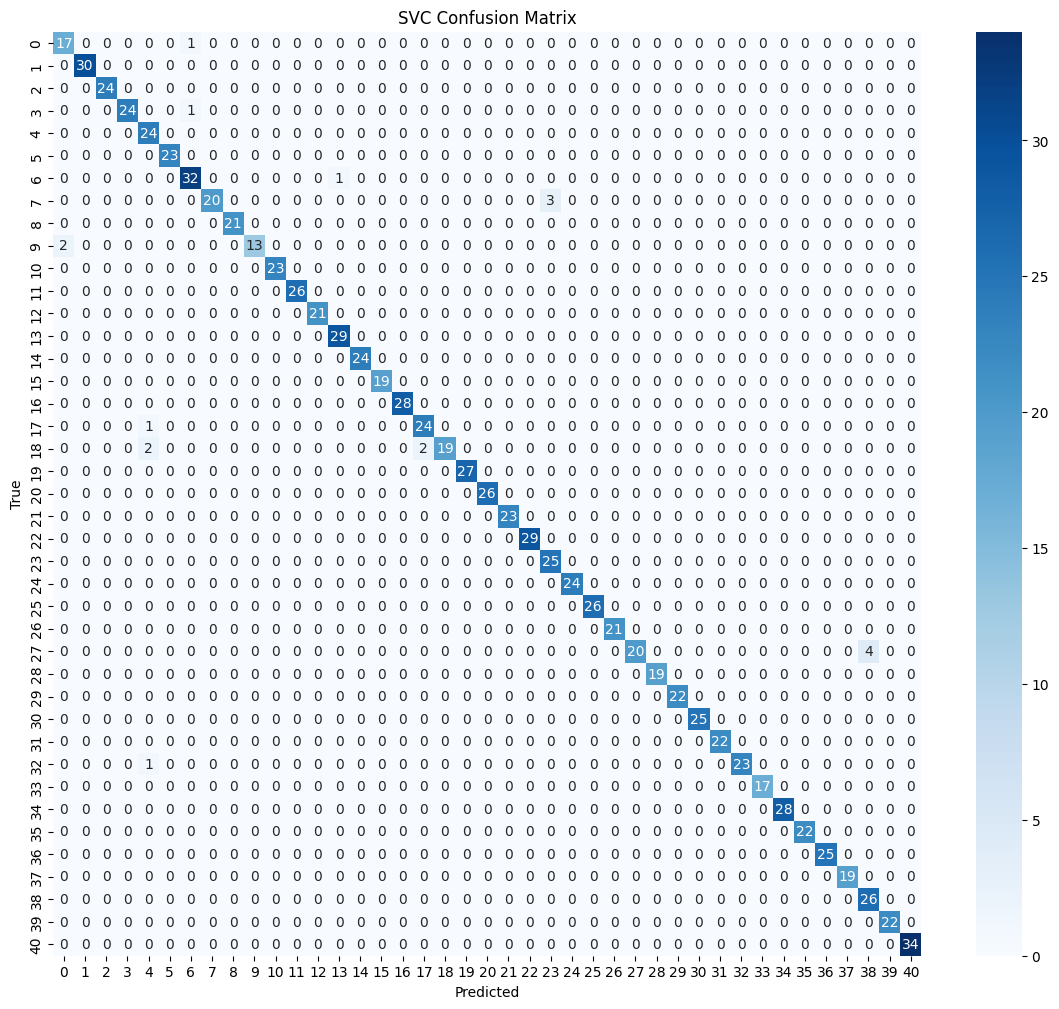

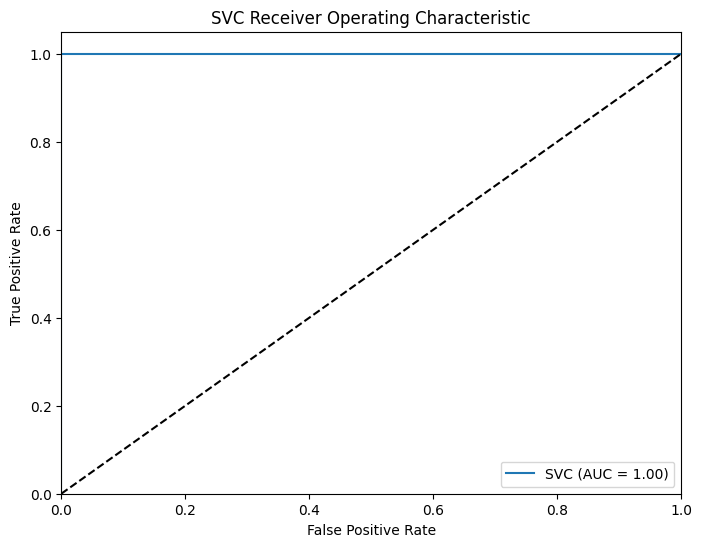

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(svc_confusion_matrix, annot=True, cmap='Blues')
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot AUC-ROC curve for SVC
plt.figure(figsize=(8, 6))
plt.plot(svc_fpr, svc_tpr, label='SVC (AUC = {:.2f})'.format(svc_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier

In [ ]:
# Random Forest model with hyperparameters
rf_model = RandomForestClassifier()
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid)

# Model Training
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

# Model Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_best_model.predict_proba(X_test), multi_class='ovr')
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_best_model.predict_proba(X_test)[:, 1], pos_label=rf_best_model.classes_[1])

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest AUC-ROC:", rf_roc_auc)

# Classification report and confusion matrix for Random Forest model
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Accuracy: 0.9949186991869918
Random Forest AUC-ROC: 0.9999936842699229
Random Forest Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       1.00      1.00      1.00        18
                                  AIDS       1.00      1.00      1.00        30
                                  Acne       1.00      1.00      1.00        24
                   Alcoholic hepatitis       1.00      1.00      1.00        25
                               Allergy       0.92      1.00      0.96        24
                             Arthritis       1.00      1.00      1.00        23
                      Bronchial Asthma       1.00      1.00      1.00        33
                  Cervical spondylosis       1.00      0.87      0.93        23
                           Chicken pox       1.00      1.00      1.00        21
                   Chronic cholestasis       1.00      1.00      1.00       

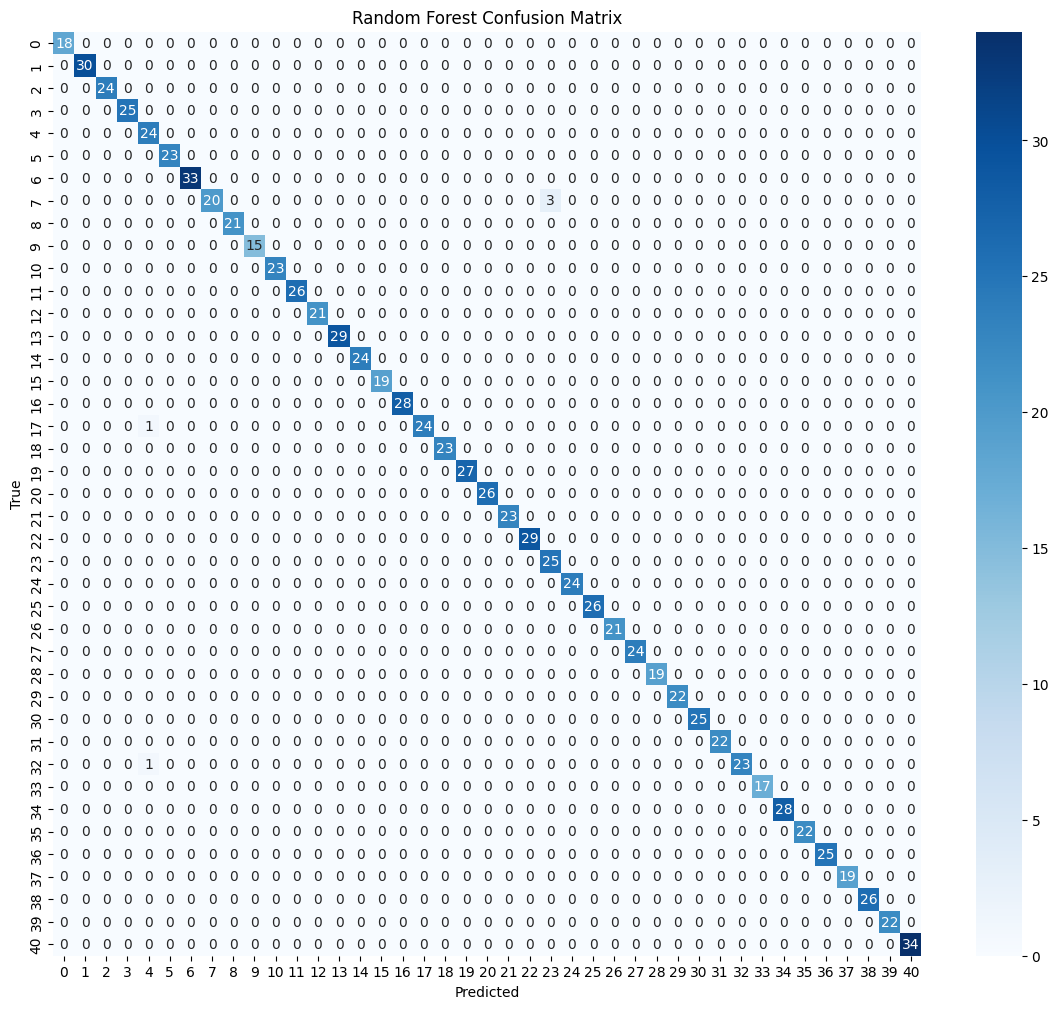

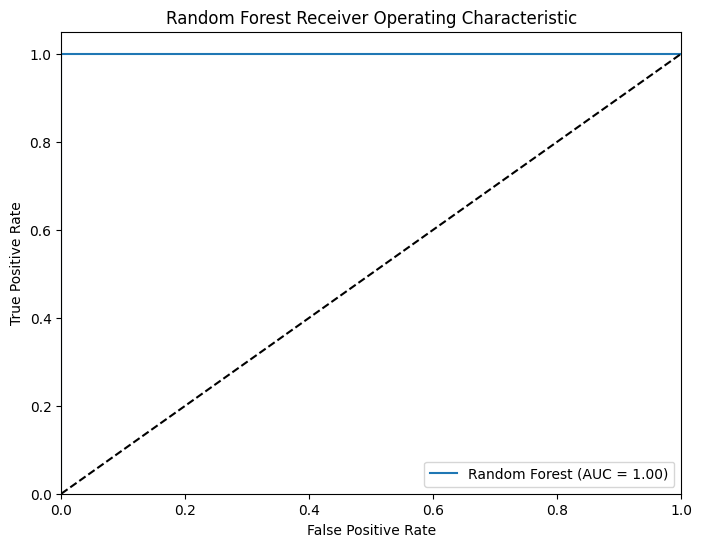

In [ ]:
# Heatmap for Random Forest Confusion Matrix
plt.figure(figsize=(14, 12))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot AUC-ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Logistic Regression model

In [ ]:
# Logistic Regression model with hyperparameters
lr_model = LogisticRegression()
lr_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid)

# Model Training
lr_grid_search.fit(X_train, y_train)
lr_best_model = lr_grid_search.best_estimator_
lr_predictions = lr_best_model.predict(X_test)

# Model Evaluation
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_best_model.predict_proba(X_test), multi_class='ovr')
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_best_model.predict_proba(X_test)[:, 1], pos_label=lr_best_model.classes_[1])

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression AUC-ROC:", lr_roc_auc)

# Classification report and confusion matrix for Logistic Regression model
lr_classification_report = classification_report(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
print("Logistic Regression Classification Report:\n", lr_classification_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.8902439024390244
Logistic Regression AUC-ROC: 0.9917416144863701
Logistic Regression Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       0.83      0.83      0.83        18
                                  AIDS       0.84      0.87      0.85        30
                                  Acne       1.00      1.00      1.00        24
                   Alcoholic hepatitis       0.91      0.80      0.85        25
                               Allergy       0.73      0.79      0.76        24
                             Arthritis       0.95      0.83      0.88        23
                      Bronchial Asthma       0.89      0.48      0.63        33
                  Cervical spondylosis       0.78      0.61      0.68        23
                           Chicken pox       1.00      1.00      1.00        21
                   Chronic cholestasis       0.76      0.8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


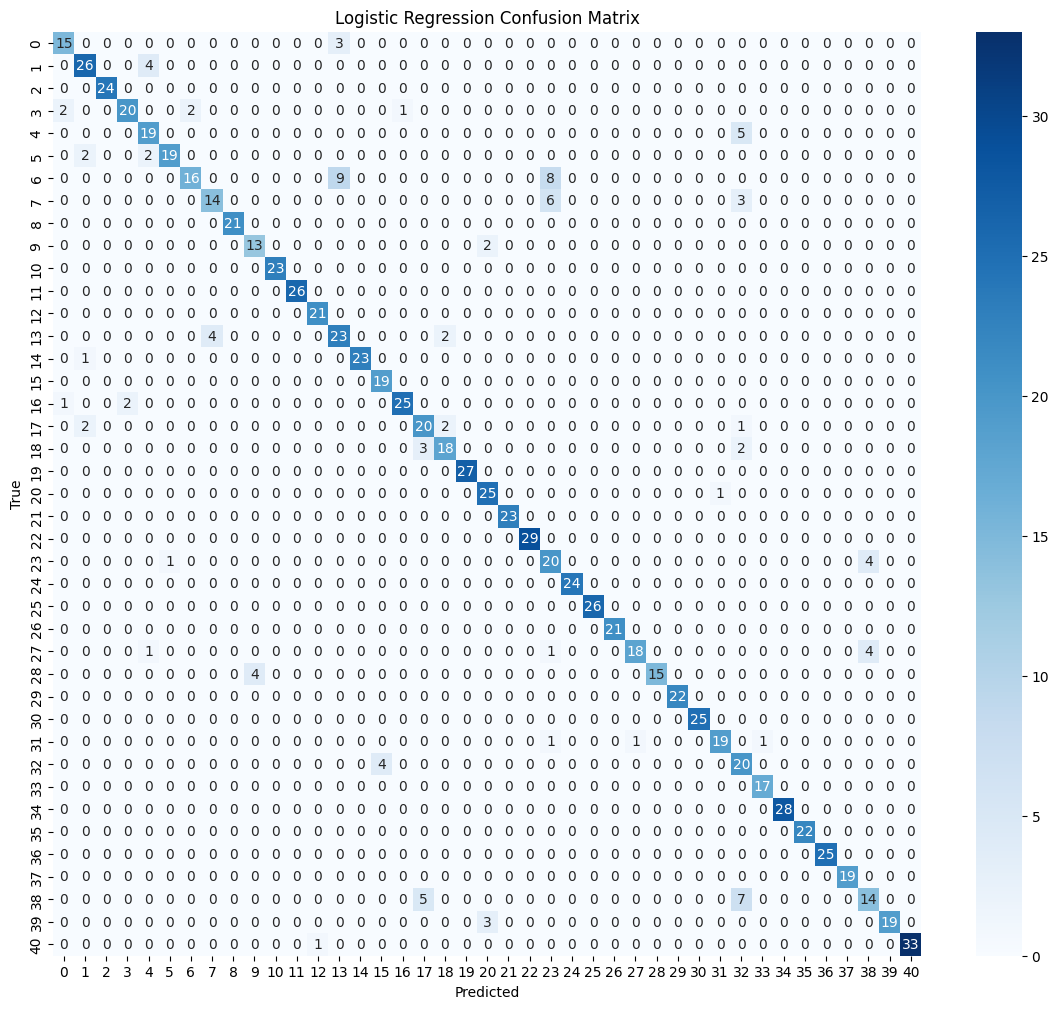

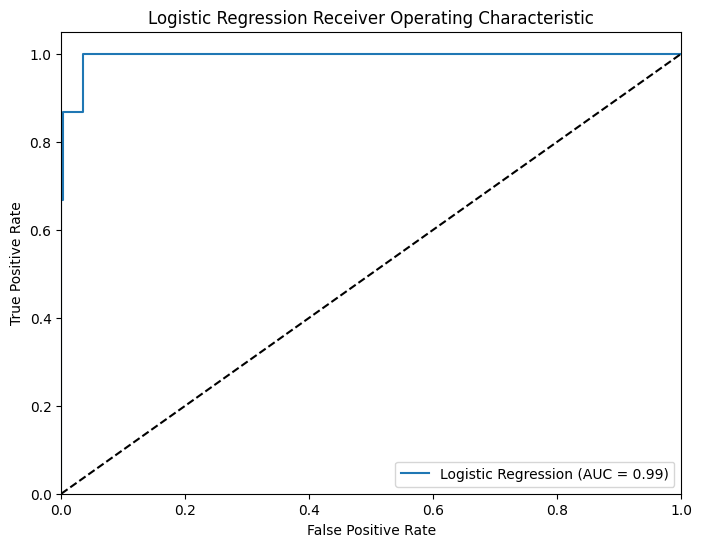

In [ ]:
# Heatmap for Logistic Regression Confusion Matrix
plt.figure(figsize=(14, 12))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot AUC-ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Decision Tree model

In [ ]:
# Decision Tree model with hyperparameters
dt_model = DecisionTreeClassifier()
dt_param_grid = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid)

# Model Training
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_
dt_predictions = dt_best_model.predict(X_test)

#model Evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_best_model.predict_proba(X_test), multi_class='ovr')
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_best_model.predict_proba(X_test)[:, 1], pos_label=dt_best_model.classes_[1])

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree AUC-ROC:", dt_roc_auc)

# Classification report and confusion matrix for Decision Tree model
dt_classification_report = classification_report(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Classification Report:\n", dt_classification_report)

Decision Tree Accuracy: 0.9949186991869918
Decision Tree AUC-ROC: 0.9999936842699229
Decision Tree Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       1.00      1.00      1.00        18
                                  AIDS       1.00      1.00      1.00        30
                                  Acne       1.00      1.00      1.00        24
                   Alcoholic hepatitis       1.00      1.00      1.00        25
                               Allergy       0.92      1.00      0.96        24
                             Arthritis       1.00      1.00      1.00        23
                      Bronchial Asthma       1.00      1.00      1.00        33
                  Cervical spondylosis       1.00      0.87      0.93        23
                           Chicken pox       1.00      1.00      1.00        21
                   Chronic cholestasis       1.00      1.00      1.00       

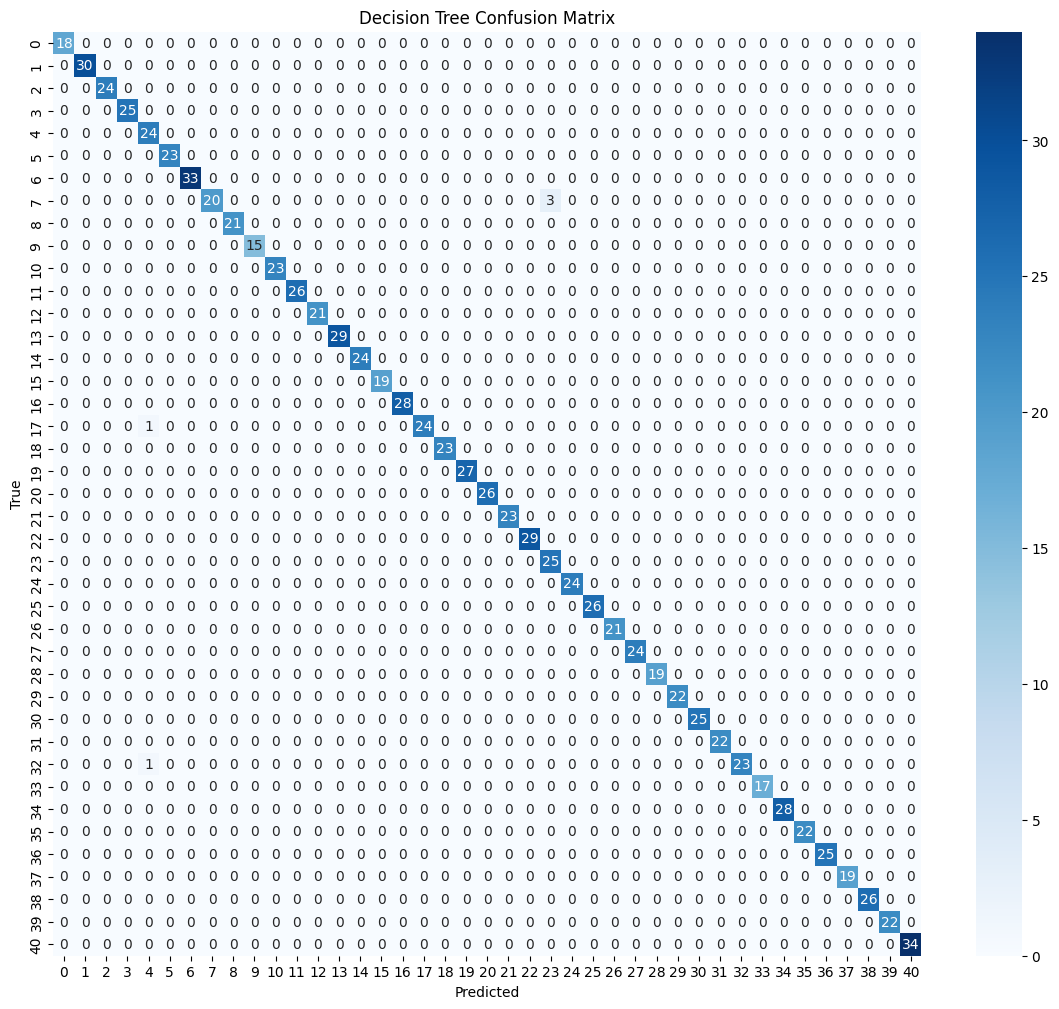

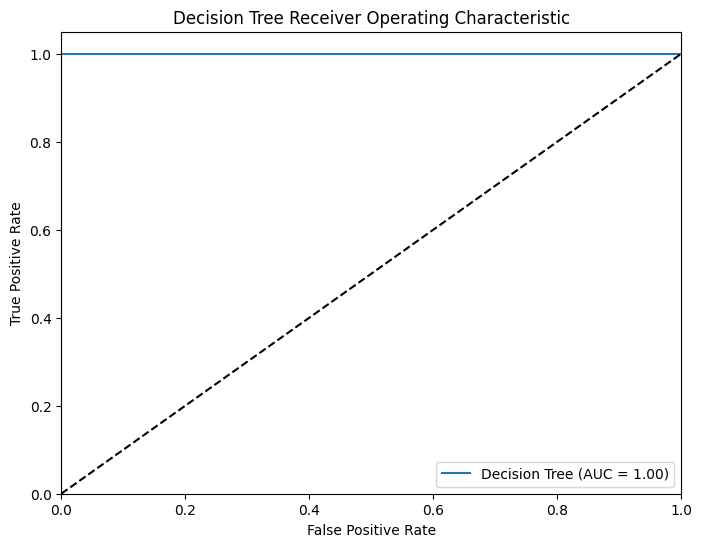

In [ ]:
# Heatmap for Decision Tree Confusion Matrix
plt.figure(figsize=(14, 12))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot AUC-ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Native Bayes Model

In [ ]:
# Naive Bayes model training
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Model Evaluation
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test), multi_class='ovr')
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1], pos_label=nb_model.classes_[1])

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes AUC-ROC:", nb_roc_auc)

# Classification report and confusion matrix for Naive Bayes model
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Classification Report:\n", nb_classification_report)


Naive Bayes Accuracy: 0.8526422764227642
Naive Bayes AUC-ROC: 0.9957265152574595
Naive Bayes Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       0.71      0.83      0.77        18
                                  AIDS       0.79      0.87      0.83        30
                                  Acne       1.00      1.00      1.00        24
                   Alcoholic hepatitis       1.00      0.76      0.86        25
                               Allergy       0.90      0.79      0.84        24
                             Arthritis       1.00      0.52      0.69        23
                      Bronchial Asthma       1.00      0.70      0.82        33
                  Cervical spondylosis       0.54      0.61      0.57        23
                           Chicken pox       1.00      0.90      0.95        21
                   Chronic cholestasis       1.00      0.87      0.93        15
  

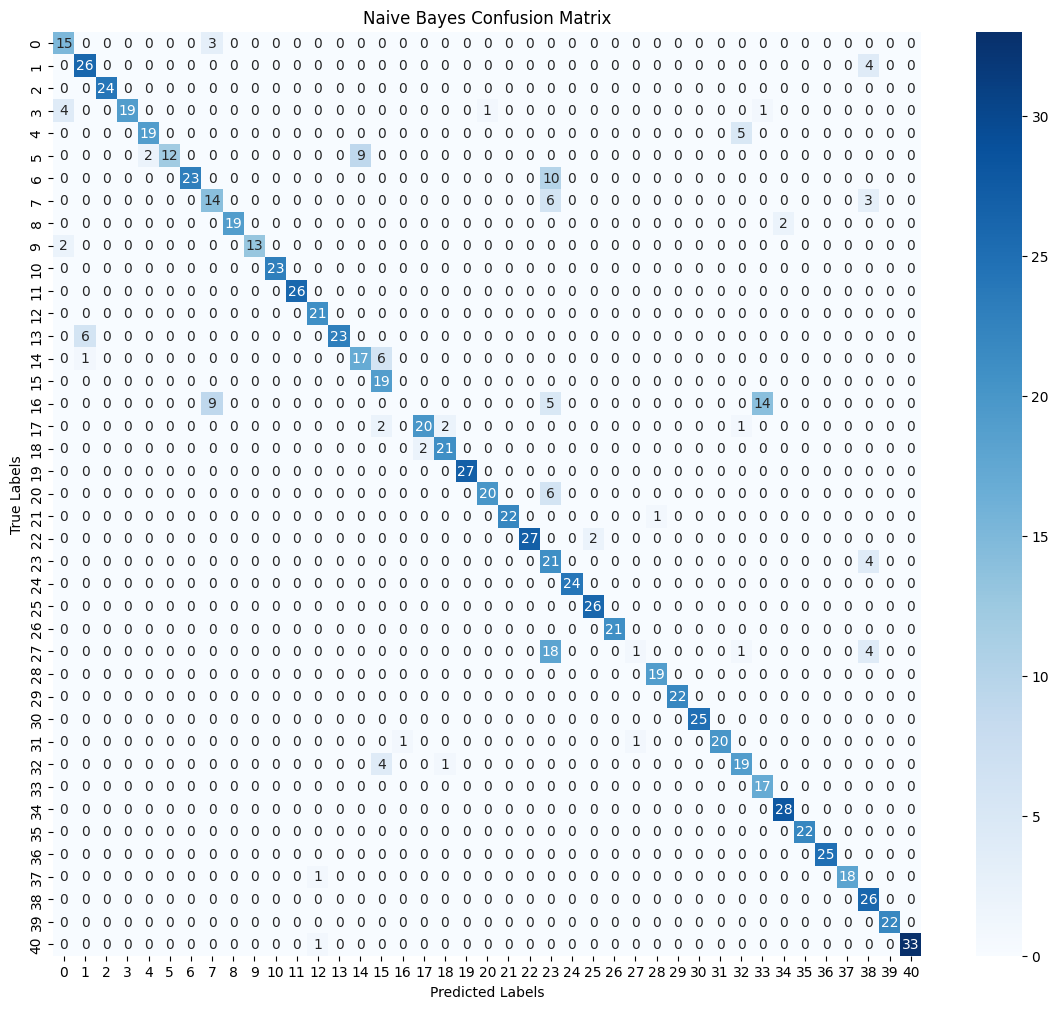

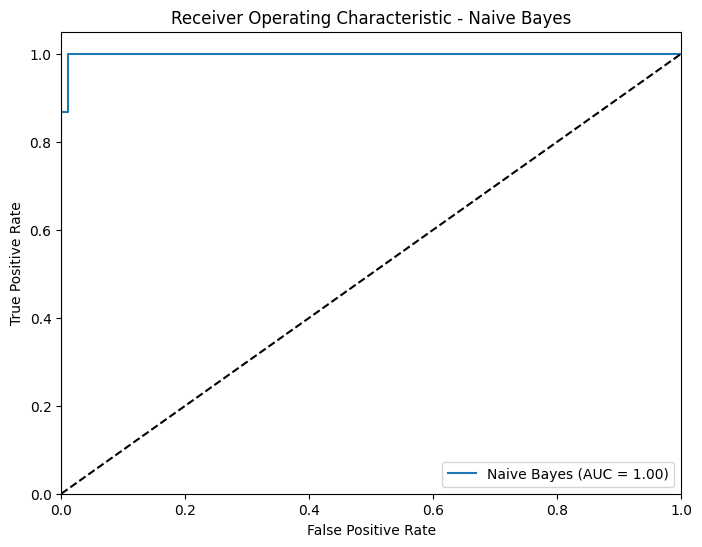

In [ ]:
# Heatmap for Naive Bayes confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(nb_confusion_matrix, annot=True, cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# AUC-ROC curve for Naive Bayes model
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

Cross validating the result of the above models

In [ ]:
# Cross-validation
models = [svc_best_model, rf_best_model, nb_model,dt_best_model, lr_best_model]
model_names = ['SVC', 'Random Forest', 'Naive Bayes', 'Decision Tree', 'Logistic Regression']

for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.2f}")

SVC Cross-Validation Accuracy: 0.98
Random Forest Cross-Validation Accuracy: 1.00
Naive Bayes Cross-Validation Accuracy: 0.88
Decision Tree Cross-Validation Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


from the result above the performance of the models above

---



* SVC Cross-Validation Accuracy: ***98%***

* Random Forest Cross-Validation Accuracy: ***100%***

* Decision Tree Cross-Validation Accuracy: ***88%***

* Native Bayes Cross-Validation Accuracy: ***100%***

* Logistic Regression Cross-Validation Accuracy: ***91%***



---

The *Random Forest Model* and *Decision Tree model* have the same accuracy and roc_auc score.

so either can be use but in this case we will be using  the *Random Forest model*


Exporting the Models

In [ ]:
# importing the joblib library
import joblib

# Exporting the Random Forest Model
joblib.dump(rf_model, 'rf_model.pkl')

['dt_model.pkl']

In [ ]:
import pandas as pd
from flask import Flask, render_template, request, jsonify, redirect, url_for
import joblib
import json

app = Flask(__name__)

# Load the trained Random Forest model from the pickle file
rf_model = joblib.load('rf_model.pkl')

# Load the symptoms and weights from the CSV file
symptoms_data = pd.read_csv('Symptoms severity Modified.csv')
symptoms_list = symptoms_data['Symptom'].tolist()
symptoms_data.set_index('Symptom', inplace=True)

description_data = pd.read_csv('symptom_Description.csv')
precautions_data = pd.read_csv('symptom_precaution_edited.csv')

@app.route('/')
def home():
    return render_template('index.html', symptoms_list=symptoms_list, selected_symptoms=[])

@app.route('/predict', methods=['GET'])
def predict():
    selected_symptoms = request.args.get('symptoms')
    selected_symptoms_list = selected_symptoms.split(',')

    # Get the corresponding weights for the selected symptoms
    selected_weights = [symptoms_data.loc[symptom, 'weight'] for symptom in selected_symptoms_list]
    if len(selected_weights) < 17:
        selected_weights.extend([0] * (17 - len(selected_weights)))  # Add zeros to complete 17 weights

    # Make a prediction using the Random Forest model
    prediction = rf_model.predict([selected_weights])[0]

    description = description_data.loc[description_data['Disease'] == prediction, 'Description'].iloc[0]
    precautions = precautions_data.loc[precautions_data['Disease'] == prediction, 'Precautions'].iloc[0]

    precautions_list = precautions.split(',') if isinstance(precautions, str) else []

    # Pass the prediction, description, and precautions list to the result.html template
    return render_template('result.html', prediction=prediction, description=description, precautions=precautions_list)

@app.route('/results', methods=['GET'])
def results():
    return render_template('result.html')


if __name__ == '__main__':
    app.run(debug=True)


['rf_model.pkl']

In [ ]:
!pip install -U flask scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: flask
    Found existing installation: Flask 2.2.5
    Uninstalling Flask-2.2.5:
      Successfully uninstalled Flask-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 require

In [ ]:
flask run